In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
datagen = ImageDataGenerator()

In [4]:
from common import constants
from pandas import read_csv

import numpy as np

train_tuples_df = read_csv(constants.DATASET_MAPPINGS['train_tuples'])

dataset = 'train'
train_set_loc = constants.DATASET_MAPPINGS[dataset]
input_shape = constants.INPUT_SHAPE
batch_size = 2

iterator = datagen.flow_from_dataframe(
                train_tuples_df.loc[:, ['Anchor', 'Label']],
                train_set_loc,
                x_col='Anchor',
                y_col='Label', 
                has_ext=True,
                target_size = input_shape[:2],
                batch_size=batch_size,
                shuffle=False,
                class_mode = None)

images = next(iterator)


C:\Users\nares\Anaconda3\lib\site-packages\keras_preprocessing\image.py:2059: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.df[x_col] = self.df[x_col].astype(str)


Found 25361 images.


In [9]:
print(images[0][0][0])

[27. 54. 71.]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


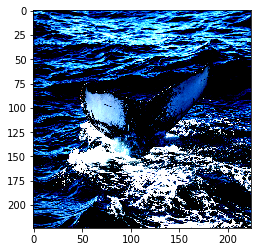

In [18]:
from matplotlib import pyplot as plt

plt.imshow(image[0, :, :, :])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


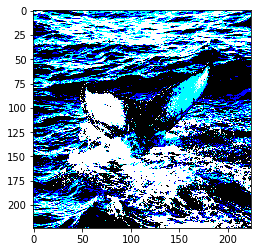

In [15]:
from matplotlib import pyplot as plt

plt.imshow(image[0, :, :, :])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


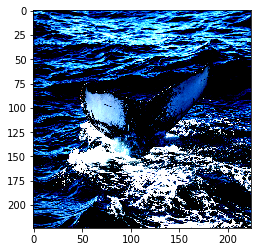

In [10]:
from matplotlib import pyplot as plt

plt.imshow(image[0, :, :, :])

In [19]:
datagen = ImageDataGenerator(
                    train_set_loc, 
                    train_tuples_df, 
                    input_shape[:2], 
                    batch_size,
                    validation_split = validation_split,
                    cache_size = cache_size)

NameError: name 'validation_split' is not defined

In [59]:
from image.transformation import ImageDataTransformation

transformer = ImageDataTransformation(samplewise_std_normalization = True)

mean_images = np.array([image - np.mean(image) for image in images])

print(mean_images.shape)

transformed_images = []

for image in mean_images:
    transformed_image = image/np.std(image)
    transformed_images.append(transformed_image)
    
print(transformed_images)




(2, 224, 224, 3)
[array([[[-1.1194512 , -0.6097499 , -0.28882688],
        [-1.2138402 , -0.74189466, -0.3643382 ],
        [-0.96842855, -0.49648294, -0.08117081],
        ...,
        [-0.21331558,  0.27750784,  0.7494535 ],
        [ 0.20199655,  0.7494535 ,  1.3535439 ],
        [ 0.1642409 ,  0.65506434,  1.2780325 ]],

       [[-0.34546036,  0.14536308,  0.6173087 ],
        [-0.19443776,  0.25863004,  0.7116978 ],
        [-0.42097166, -0.00565952,  0.44740826],
        ...,
        [-1.3837407 , -0.9117951 , -0.49648294],
        [-1.2138402 , -0.72301686, -0.40209383],
        [-1.0628177 , -0.57199425, -0.25107124]],

       [[ 0.22087437,  0.7305756 ,  1.2780325 ],
        [ 0.50404173,  0.9948652 ,  1.5045664 ],
        [ 0.579553  ,  1.0326208 ,  1.5234443 ],
        ...,
        [-0.57199425, -0.11892647,  0.40965262],
        [-0.57199425, -0.11892647,  0.40965262],
        [-0.6663834 , -0.21331558,  0.3152635 ]],

       ...,

       [[-0.6097499 , -0.19443776,  0.2586

In [39]:
print(np.std([1, 3]))

1.0
